# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units= "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=" + city

In [5]:
#build request and store in a variable.     
response=requests.get(query_url).json()
response


{'cod': '404', 'message': 'city not found'}

In [6]:
# lat=response['coord']['lat']
# lon=response['coord']['lon']


In [7]:
cities_clean=[]
lat=[]
lon=[]
temp=[]
humidity =[]
wind_speed=[]
date=[]
clouds=[]

for index, city in enumerate(cities):
    try:
        units= "metric"
        url = "http://api.openweathermap.org/data/2.5/weather?"

        query_url = url + "appid=" + weather_api_key + "&q=" + city
        response=requests.get(query_url).json()
        cities_clean.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        clouds.append(response['weather'][0]['description'])
        #date.append(response['weather'][0]['description'])
        
        #Include a print log of each city as it'sbeing processed (with the city number and city name).
        print(f'printing city number {index + 1}, {city}')
    except KeyError:
        #if city is not found, remove from dataframe.
        cities_clean.pop(-1)
        print(f"city {index+1}, {city} not found, skipping.")
  

        
#cities_clean       


printing city number 1, budhlada
printing city number 2, severo-kurilsk
printing city number 3, mataura
printing city number 4, upernavik
city 5, mullaitivu not found, skipping.
printing city number 6, kungurtug
printing city number 7, kapaa
printing city number 8, luwuk
printing city number 9, hermanus
printing city number 10, santa isabel
printing city number 11, sorland
printing city number 12, baker city
city 13, satitoa not found, skipping.
printing city number 14, tual
printing city number 15, atar
printing city number 16, port-gentil
printing city number 17, hasaki
printing city number 18, qaanaaq
city 19, belushya guba not found, skipping.
printing city number 20, ancud
printing city number 21, punta arenas
printing city number 22, abashiri
printing city number 23, prachin buri
printing city number 24, kaitangata
printing city number 25, araouane
printing city number 26, bethel
printing city number 27, faanui
printing city number 28, fortuna
printing city number 29, ribeira gra

printing city number 232, cidreira
printing city number 233, jaisalmer
printing city number 234, bandarbeyla
printing city number 235, formosa
printing city number 236, cascais
printing city number 237, verkhnevilyuysk
printing city number 238, airai
city 239, tsihombe not found, skipping.
printing city number 240, zabaykalsk
printing city number 241, khorinsk
printing city number 242, los llanos de aridane
printing city number 243, ormara
printing city number 244, nuuk
printing city number 245, padang
printing city number 246, texarkana
printing city number 247, niono
printing city number 248, shiyan
city 249, kawana waters not found, skipping.
printing city number 250, cherskiy
printing city number 251, rawson
printing city number 252, luoyang
printing city number 253, port augusta
printing city number 254, redmond
printing city number 255, rio branco
printing city number 256, mariental
printing city number 257, taywarah
printing city number 258, coquimbo
printing city number 259, pe

printing city number 465, mancio lima
city 466, uniao da victoria not found, skipping.
printing city number 467, shimoda
printing city number 468, davidson
printing city number 469, faya
city 470, sorvag not found, skipping.
printing city number 471, bad driburg
printing city number 472, cairns
printing city number 473, cobija
printing city number 474, midyat
printing city number 475, san juan
city 476, nizhneyansk not found, skipping.
printing city number 477, tsogni
printing city number 478, mazatlan
printing city number 479, manado
printing city number 480, kuusamo
printing city number 481, marystown
printing city number 482, corralillo
printing city number 483, tres passos
printing city number 484, srednekolymsk
city 485, grand centre not found, skipping.
city 486, maloshuyka not found, skipping.
printing city number 487, severo-yeniseyskiy
printing city number 488, xinmin
printing city number 489, wawa
printing city number 490, korla
printing city number 491, khudumelapye
printing

In [8]:
weather_data=pd.DataFrame({'city name': cities_clean, 'lat': lat,
                           'lon': lon, 'temp': temp,
                           'humidity': humidity,
                           'cloudiness': clouds,
                          'wind speed':wind_speed})

print(weather_data)
#check max humidity values
weather_data['humidity'].max()
#max humidity value is 100, so no need to remove any rows. 

          city name      lat       lon    temp  humidity       cloudiness  \
0          budhlada  29.9333   75.5667  301.09        44  overcast clouds   
1    severo-kurilsk  50.6789  156.1250  283.67        56        clear sky   
2           mataura -46.1927  168.8643  284.53        98       light rain   
3         upernavik  72.7868  -56.1549  273.29        77  overcast clouds   
4         kungurtug  50.5994   97.5228  283.72        75  overcast clouds   
..              ...      ...       ...     ...       ...              ...   
562       manzhouli  49.6000  117.4333  288.55        41  overcast clouds   
563      uruguaiana -29.7547  -57.0883  288.11        67        clear sky   
564           mutis   6.2262  -77.4044  299.08        88  overcast clouds   
565          bamako  12.6500   -8.0000  304.38        26       few clouds   
566      winnemucca  40.9730 -117.7357  299.32        20    broken clouds   

     wind speed  
0          4.59  
1          3.30  
2          3.49  
3  

100

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#export to csv
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

In [10]:
weather_data_csv=pd.read_csv("weatherdata.csv")
weather_data_csv

,city name,lat,lon,temp,humidity,cloudiness,wind speed
0,budhlada,29.9333,75.5667,301.09,44,overcast clouds,4.59
1,severo-kurilsk,50.6789,156.1250,283.67,56,clear sky,3.30
2,mataura,-46.1927,168.8643,284.53,98,light rain,3.49
3,upernavik,72.7868,-56.1549,273.29,77,overcast clouds,3.42
4,kungurtug,50.5994,97.5228,283.72,75,overcast clouds,1.59
...,...,...,...,...,...,...,...
562,manzhouli,49.6000,117.4333,288.55,41,overcast clouds,4.17
563,uruguaiana,-29.7547,-57.0883,288.11,67,clear sky,2.06
564,mutis,6.2262,-77.4044,299.08,88,overcast clouds,2.17
565,bamako,12.6500,-8.0000,304.38,26,few clouds,0.40


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature(c)')

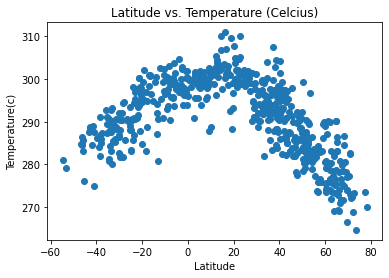

In [11]:
x=weather_data_csv['lat']
y=weather_data_csv['temp']
plt.scatter(x, y)
plt.title('Latitude vs. Temperature (Celcius)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(c)')

## Latitude vs. Humidity Plot

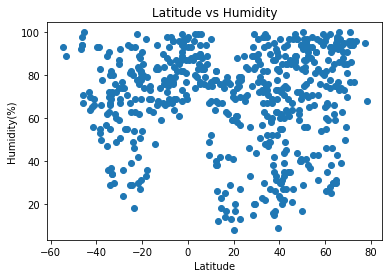

In [12]:

hum=weather_data_csv['humidity']
plt.scatter(x, hum)
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig("png")

## Latitude vs. Cloudiness Plot

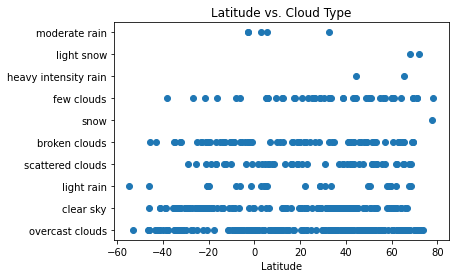

In [13]:
cloudiness=weather_data_csv['cloudiness']
plt.scatter(x,cloudiness)
plt.xlabel('Latitude')
plt.title('Latitude vs. Cloud Type')
plt.savefig("png")

## Latitude vs. Wind Speed Plot

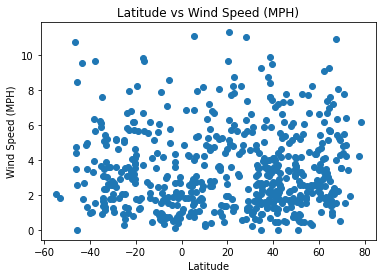

<Figure size 432x288 with 0 Axes>

In [16]:
wind=weather_data_csv['wind speed']
plt.scatter(x, wind)
plt.title('Latitude vs Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()
plt.savefig("png")

## Linear Regression

In [19]:
#split dataframe by northern and southern hemisphere
northern=weather_data_csv.loc[weather_data_csv['lat'] > 0]
southern=weather_data_csv.loc[weather_data_csv['lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

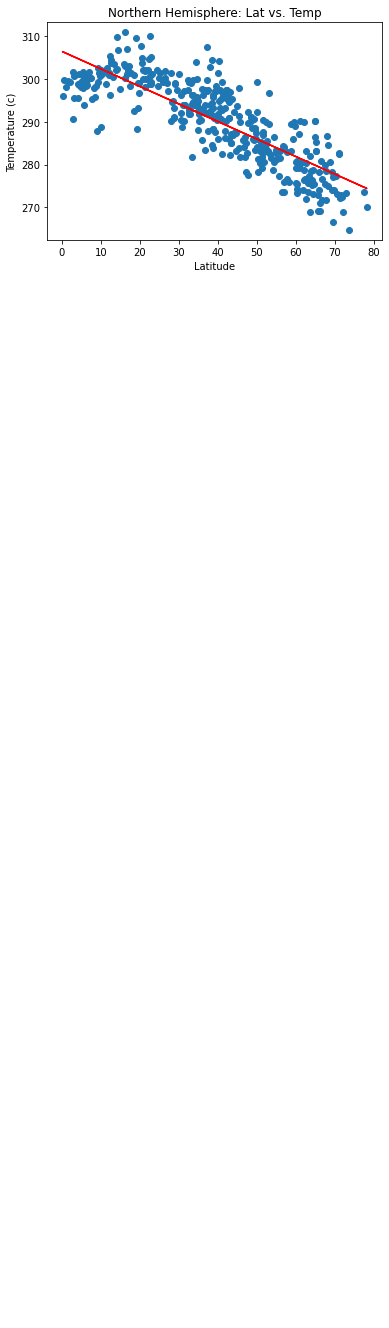

In [24]:
x_ax=northern['lat']
temp=northern['temp']
plt.scatter(x_ax, temp)
plt.title('Northern Hemisphere: Lat vs. Temp')
plt.xlabel('Latitude')
plt.ylabel('Temperature (c)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_ax, temp)
regress_values = x_ax * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_ax,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

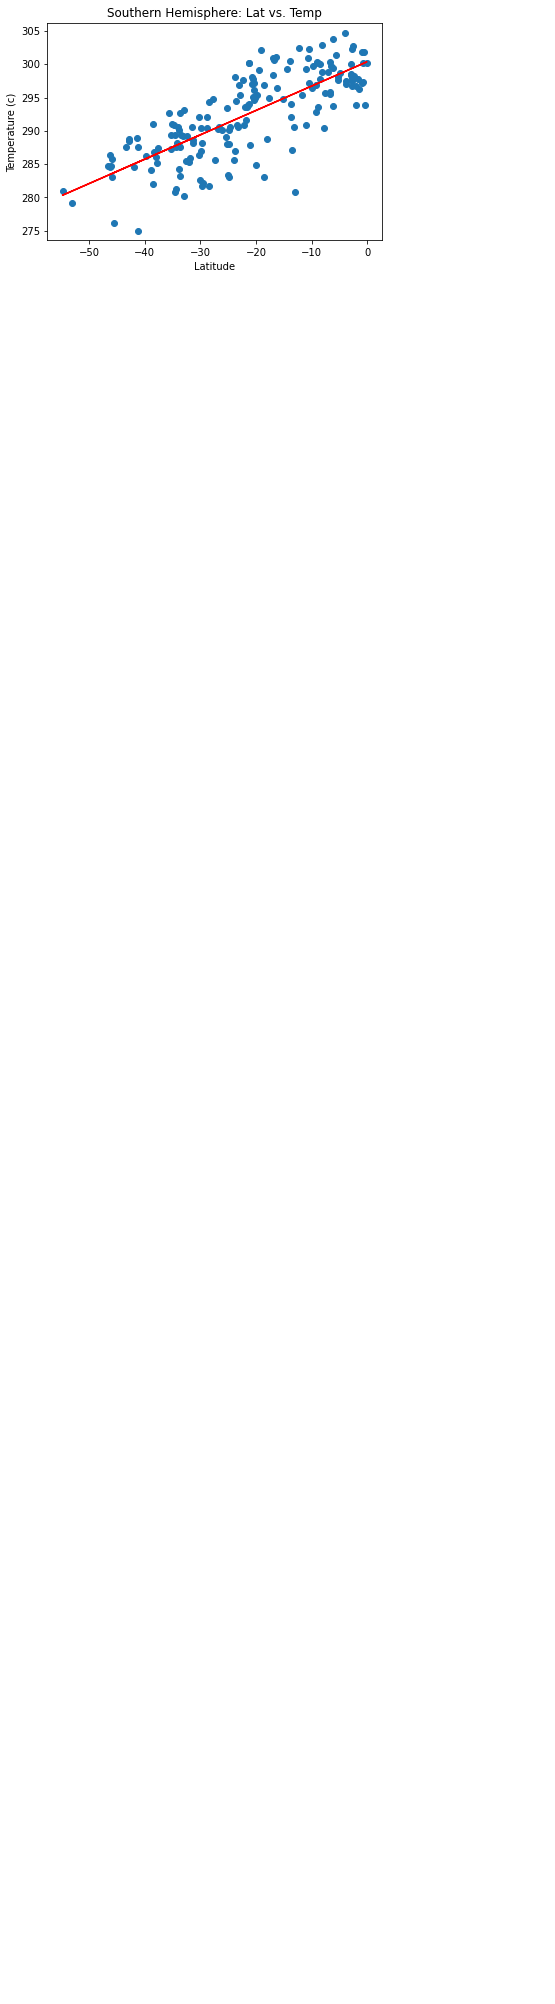

<Figure size 432x288 with 0 Axes>

In [26]:
x_ax=southern['lat']
temp=southern['temp']
plt.scatter(x_ax, temp)
plt.title('Southern Hemisphere: Lat vs. Temp')
plt.xlabel('Latitude')
plt.ylabel('Temperature (c)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_ax, temp)
regress_values = x_ax * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_ax,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()
plt.savefig("png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

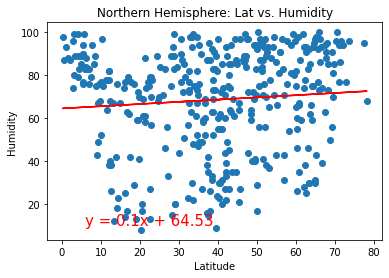

<Figure size 432x288 with 0 Axes>

In [27]:
x_ax=northern['lat']
humidity=northern['humidity']
plt.scatter(x_ax, humidity)
plt.title('Northern Hemisphere: Lat vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_ax, humidity)
regress_values = x_ax * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_ax,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()
plt.savefig("png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

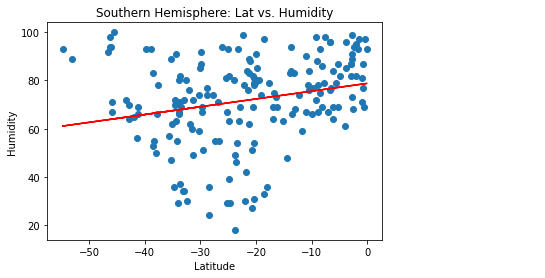

<Figure size 432x288 with 0 Axes>

In [28]:
x_ax=southern['lat']
humidity=southern['humidity']
plt.scatter(x_ax, humidity)
plt.title('Southern Hemisphere: Lat vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_ax, humidity)
regress_values = x_ax * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_ax,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()
plt.savefig("png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

TypeError: unsupported operand type(s) for /: 'str' and 'int'

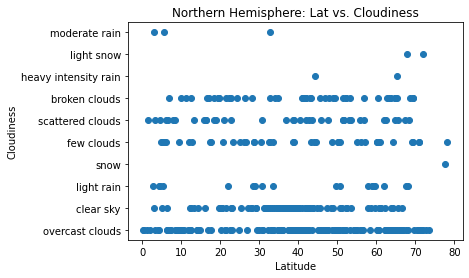

In [29]:
x_ax=northern['lat']
cloud=northern['cloudiness']
plt.scatter(x_ax, cloud)
plt.title('Northern Hemisphere: Lat vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_ax, cloud)
regress_values = x_ax * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_ax,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()
plt.savefig("png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

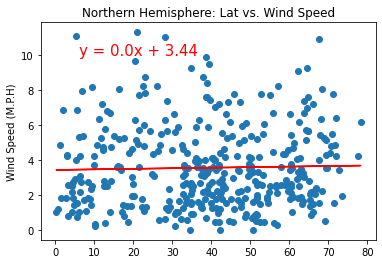

<Figure size 432x288 with 0 Axes>

In [30]:
x_ax=northern['lat']
windy=northern['wind speed']
plt.scatter(x_ax, windy)
plt.title('Northern Hemisphere: Lat vs. Wind Speed')
plt.ylabel('Wind Speed (M.P.H)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_ax, windy)
regress_values = x_ax * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_ax,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()
plt.savefig("png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

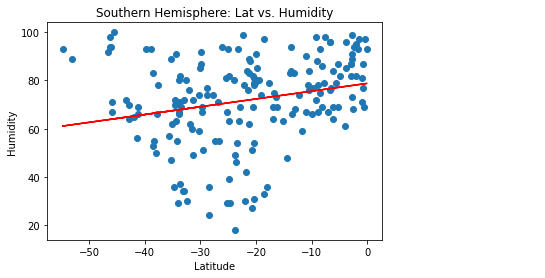

<Figure size 432x288 with 0 Axes>

In [31]:
x_ax=southern['lat']
humidity=southern['humidity']
plt.scatter(x_ax, humidity)
plt.title('Southern Hemisphere: Lat vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_ax, humidity)
regress_values = x_ax * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_ax,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()
plt.savefig("png")